In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [9]:
#Chloe Smith (1877342)
#Matthew Kruger (1669326)
#Philani Mpofu (1848751)
#Jesse Bristow (1875955)

[0.71369477 0.15467024 0.90412575]


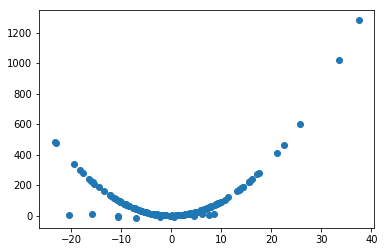

In [10]:
#sample 150 x-values from normal dist. with mean of 0, std dev of 10
x = np.random.normal(0, 10, 150)

#construct design matrix
X = np.empty((150, 3))

for i in range(150):
    X[i][0] = 1
    X[i][1] = x[i]
    X[i][2] = x[i]**2
    
#sample values for theta0, theta1, theta2 from uniform dist. between 0 and 1
theta = np.random.uniform(0, 1, 3)

#create y-values from x-values and theta values
y = np.empty(150)
for i in range(150):
    y[i] = theta[0] + (theta[1] * X[i][1]) + (theta[2] * X[i][2])
    
#insert 10% noise into y-values
for i in range(15):
    index = random.randint(0, 149)
    y[index] = np.random.normal(0, 8, 1)
    
#plot x- and y-values in scatter plot
plt.plot(x, y, 'o')

#print true theta values for comparison
print(theta)

In [11]:
#split data into training, validation and test datasets
#80% training data, 10% validation, 10% testing
trainingX = x[:120]
trainingY = y[:120]
validX = x[120:135]
validY = y[120:135]
testX = x[135:150]
testY = y[135:150]

[[ 8.19453314e-03  2.20588463e-01  4.08135075e-01 -2.82489438e-02
   8.71986078e-02  2.33969314e-01  6.65309814e-01  2.28315876e-01
   6.51251529e-02  6.76401748e-01  2.62962517e-01  3.55169970e-01
   3.49532092e-01  2.52407549e-01  4.26841926e-02  1.60659749e-01
   6.30179408e-02  1.95591880e-01  7.55332950e-01  2.37234367e-02
  -2.53347334e-02  2.42558465e-01 -5.74833733e-02  5.57098355e-02
   1.01162637e+00  1.05440134e-01  7.17987625e-01  5.22555815e-01
   3.22378784e-01  5.99294537e-01  8.48471430e-03  4.19303263e-01
   2.32339315e-02  1.22234707e-01  5.45677787e-01  3.69970548e-01
   1.64482344e-01  1.01625404e+00  8.02833128e-01  6.63553539e-01
   3.73624363e-01  6.77787006e-01  1.37957614e-01  2.98056476e-01
   4.35509103e-01  1.06743812e-01 -1.14504789e+00  1.92982945e-02
   3.33738262e-01  2.66188495e-01  1.64651335e-01  1.52582713e-01
   6.70935412e-01  3.10436950e-02  4.55247720e-01  3.06159325e-02
  -4.43014920e+00 -1.20952980e-01  9.33275504e-01  4.99871686e-01
  -6.01455

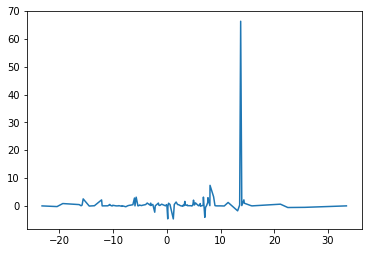

In [12]:
#find theta solution from training data
tX = X[:120]
thetaSolution = np.multiply(np.linalg.pinv(tX), trainingY)
print(thetaSolution)

#plot graph given by solution
xSorted = np.sort(trainingX, axis=None)
ySolution = thetaSolution[0] + (thetaSolution[1] * xSorted) + (thetaSolution[2] * xSorted**2)
plt.plot(xSorted, ySolution)

The learned parameter values are quite far from the true values, but generate a reasonably similar curve to the true curve.

In [13]:
#compute training error for model
trainingError = 0

def solutionY(x, theta0, theta1, theta2):
    size = len(x)
    y = np.empty(size)
    
    for i in range(size):
        y[i] = theta0 + (theta1 * x[i]) + (theta2 * (x[i]**2))
        
    return y

solY = solutionY(trainingX, theta[0], theta[1], theta[2])

for i in range(120):
    trainingError += (trainingY[i] - solY[i])**2
    
trainingError = trainingError*0.5
print(trainingError)

103931.47135541053


Training error from this model is very high.

In [15]:
#compute validation error for model
validationError = 0

solY = solutionY(validX, theta[0], theta[1], theta[2])

for i in range(15):
    validationError += (validY[i] - solY[i])**2
    
validationError = validationError*0.5
print(validationError)

1663.5906738321748


Validation error from this model is also high.

In [16]:
#using Gradient Descent instead to train model
#choose initial theta corresponding to y = x + x**2
theta = np.array([0,1,1])

#choose learning rate and tolerance for convergence
tolerance = 0.05
alpha = 0.2

#check that max difference between theta[i] values <= tolerance
diff = np.empty(3)

while True:
    thetaTemp = np.empty(3)
    
    thetaTemp = theta - alpha
    
    for i in range(3):
        diff[i] = (theta[i] - thetaDiff[i])**2
    if (np.amax(diff) <= tolerance):
        break

[0 1 1]
